In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
import tensorflow_addons as tfa

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

2023-09-28 18:58:55.483450: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 18:58:55.514312: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 18:58:55.515240: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 18:58:56.373702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 202

In [16]:
activation_method = "relu"
kernels=3
epochs=20

model = tf.keras.Sequential([
    layers.Conv2D(
        filters=16,
        kernel_size=kernels,
        activation=activation_method,
        input_shape=(32, 32, 3)
    ),
    layers.Conv2D(32, kernels, activation=activation_method),
    layers.MaxPool2D(),
    layers.Conv2D(64, kernels, activation=activation_method),
    layers.Conv2D(128, kernels, activation=activation_method),
    layers.Conv2D(256, kernels, activation=activation_method),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation=activation_method),
    layers.Dropout(0.5),
    layers.Dense(128, activation="softmax"),
])

model.summary()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tfa.optimizers.AdaBelief(learning_rate=0.0005),
    metrics=["accuracy"]
)

model.fit(
    x_train, 
    y_train,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 256)         295168    
                                                      

KeyboardInterrupt: 

In [2]:
model.save("small-objects-classifier-3.h5")

NameError: name 'model' is not defined

In [4]:
from keras.models import load_model

model = load_model("small-objects-classifier-2.h5")

In [6]:
model.evaluate(x_test, y_test)

predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


/tmp/ipykernel_11165/3809089838.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize =(1, 1))


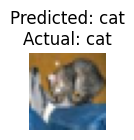

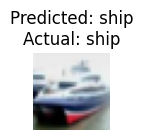

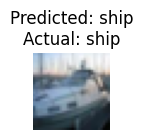

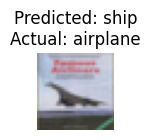

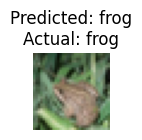

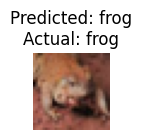

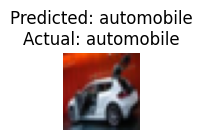

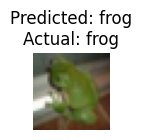

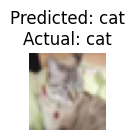

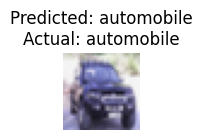

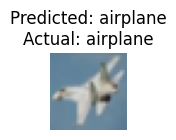

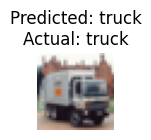

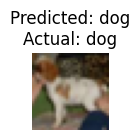

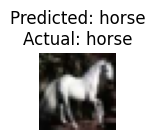

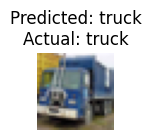

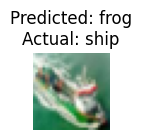

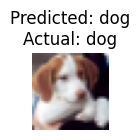

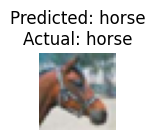

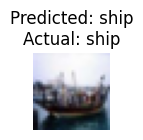

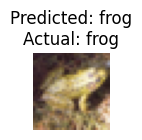

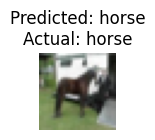

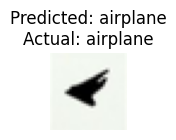

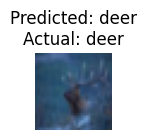

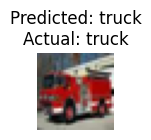

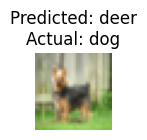

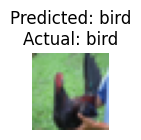

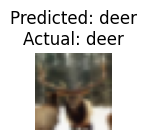

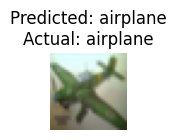

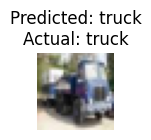

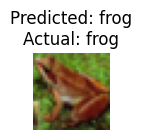

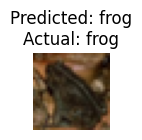

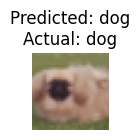

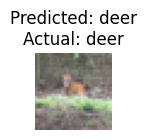

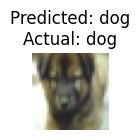

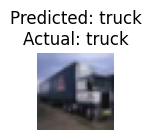

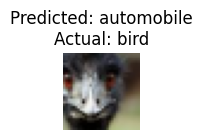

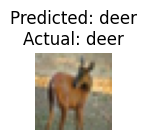

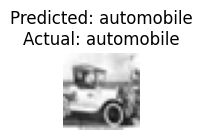

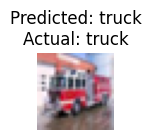

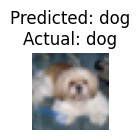

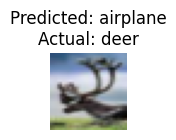

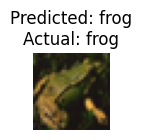

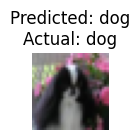

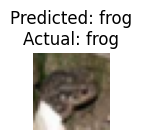

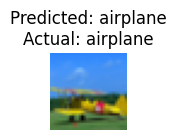

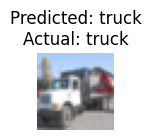

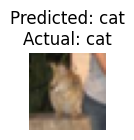

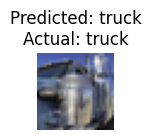

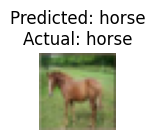

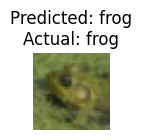

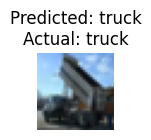

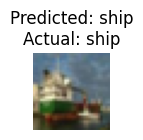

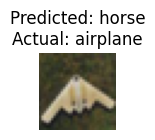

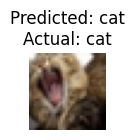

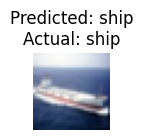

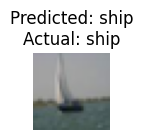

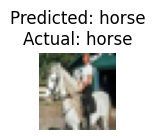

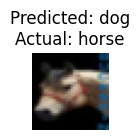

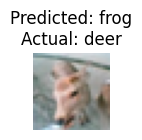

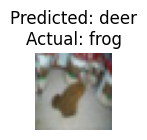

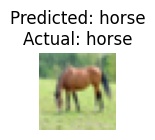

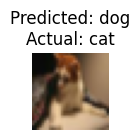

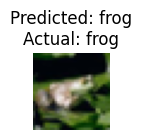

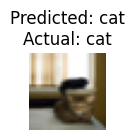

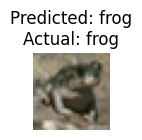

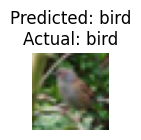

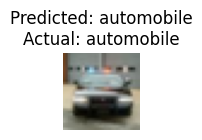

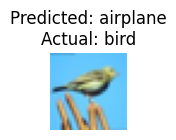

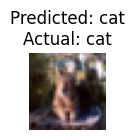

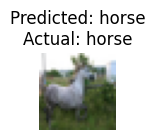

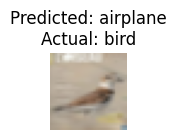

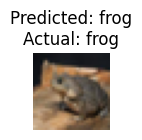

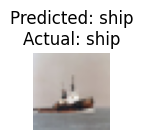

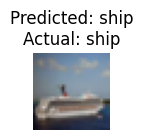

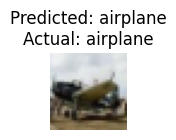

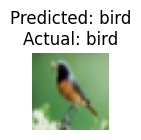

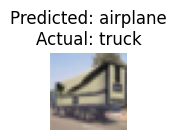

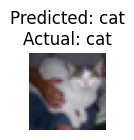

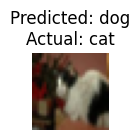

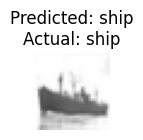

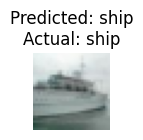

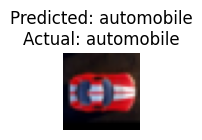

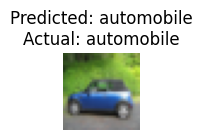

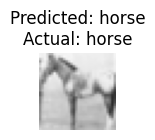

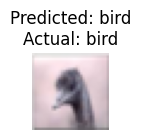

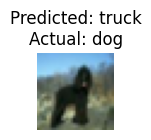

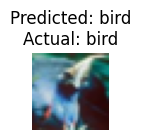

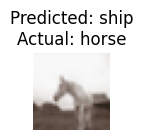

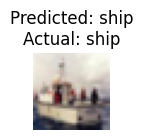

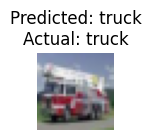

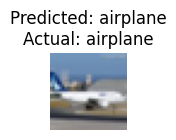

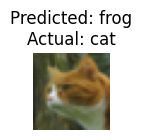

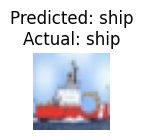

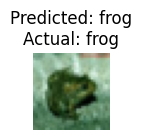

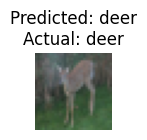

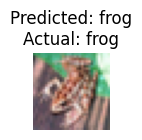

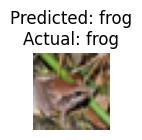

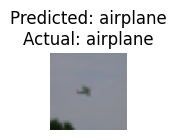

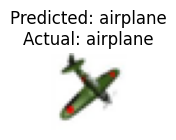

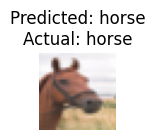

In [8]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

num_samples_to_visualize = 100

classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

for i in range(num_samples_to_visualize):
    plt.figure(figsize =(1, 1))
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {classes[predicted_labels[i]]}\nActual: {classes[int(y_test[i])]}")
    plt.axis('off')